In [1]:
from pathlib import Path
from matplotlib import pyplot as plt
from collections import Counter
import pandas as pd
import numpy as np
import os
import seaborn as sns
import torch
import pickle
pd.set_option('display.max_rows', 1000)
import pickle
import json
from torchvision.datasets import CIFAR100

In [2]:
os.listdir("../cache/")

['CIFAR10_key_avg_pool_id_train.npy',
 'CIFAR10_key_avg_pool_id_test.npy',
 'CIFAR10_key_avg_pool_id_train_targ.npy',
 'CIFAR10_key_avg_pool_id_test_targ.npy',
 'CIFAR100_key_avg_pool_ood_train.npy',
 'CIFAR100_key_avg_pool_ood_test.npy',
 'SVHN_key_avg_pool_ood_train.npy',
 'SVHN_key_avg_pool_ood_test.npy',
 'LSUNResize_key_avg_pool_ood_train.npy',
 'LSUNResize_key_avg_pool_ood_test.npy',
 'exp_202_resnet18_acc_data.pickle',
 'exp_202_resnet18_all_data.pickle',
 'CIFAR10_key_fc_id_train.npy',
 'CIFAR10_key_fc_id_test.npy',
 'CIFAR10_key_fc_id_train_targ.npy',
 'CIFAR10_key_fc_id_test_targ.npy',
 'LSUNResize_key_fc_ood_train.npy',
 'LSUNResize_key_fc_ood_test.npy',
 'CIFAR100_key_fc_ood_train.npy',
 'CIFAR100_key_fc_ood_test.npy',
 'mal_vs_cos.png',
 'mal_vs_cos_covfixed.png',
 'com_pca.png',
 'finetuned0.png',
 'finetuned1.png',
 'single_ood_results.json',
 'ens_ood_results.json',
 'new_auroc_calculator.py',
 'SVHN_key_fc_ood_train.npy',
 'SVHN_key_fc_ood_test.npy',
 'Imagenet30_key_a

In [3]:
fn = "/data/temiloluwa.adeoti/fourth_experiments/CIFAR10_clus_768_neg_256/exp_1/checkpoint_199_results/finetune/key_ckpt_199_mn_2_lp_10/single_ood_results.json"
ds = json.load(open(fn, "r"))

In [4]:
ds.keys()

dict_keys(['query_ckpt_199_mn_4_lp_10/checkpoint_0600.pth.tar', 'key_ckpt_199_mn_2_lp_10/resnet18_best.pth', 'key_ckpt_199_mn_2_lp_10/checkpoint_0600.pth.tar'])

In [5]:
df = pd.DataFrame(ds['key_ckpt_199_mn_2_lp_10/checkpoint_0600.pth.tar'])
df['auroc'] = df['auroc'] * 100

In [6]:
oods = ["CIFAR100", "SVHN", "LSUNResize"]

In [7]:
all_best_auroc = []
for i in oods:
    best_auroc = {}
    _df = df[df.ood==i].sort_values(by=['auroc']).iloc[-1]
    best_auroc['ood'] = i
    best_auroc['temperature'] = _df['temperature']
    best_auroc['auroc'] = _df['auroc']
    all_best_auroc.append(best_auroc)
all_best_auroc = pd.DataFrame(all_best_auroc)
#all_best_auroc.to_excel("../cache/finetuned_best_auroc.xlsx")
all_best_auroc

,ood,temperature,auroc
0,CIFAR100,10,84.5
1,SVHN,50,92.4
2,LSUNResize,100,90.9


In [8]:
temperature = df[df.ood=="CIFAR100"].temperature.sort_values().values
temperature = temperature.astype("str")

In [9]:
plot_data = []
oods = ["CIFAR100", "SVHN", "LSUNResize"]
for i in oods:
    plot_data.append(df[df.ood==i].sort_values(by="temperature").auroc.values)

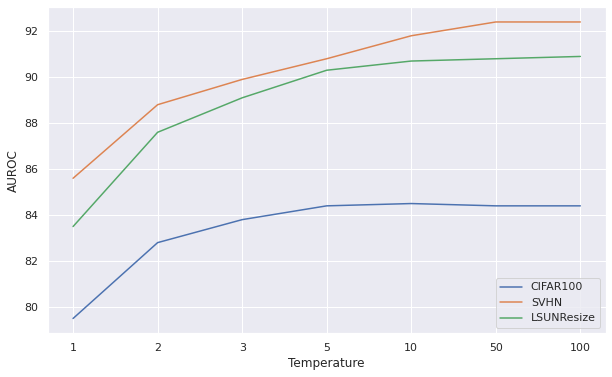

In [10]:
sns.set_theme()
df = pd.DataFrame(np.array(plot_data).T, columns=oods)
fig = plt.figure(figsize=(10, 6))
plt.plot(df)
plt.xticks(np.arange(len(temperature)), temperature)
plt.xlabel("Temperature")
plt.ylabel("AUROC")
plt.legend(oods, loc="lower right")
plt.savefig("../cache/ood_results_finetuned")

In [11]:
df = pd.DataFrame(ds['key_ckpt_199_mn_2_lp_10/resnet18_best.pth'])
df['auroc'] = df['auroc'] * 100

In [12]:
all_best_auroc = []
for i in oods:
    best_auroc = {}
    _df = df[df.ood==i].sort_values(by=['auroc']).iloc[-1]
    best_auroc['ood'] = i
    best_auroc['temperature'] = _df['temperature']
    best_auroc['auroc'] = _df['auroc']
    all_best_auroc.append(best_auroc)
all_best_auroc = pd.DataFrame(all_best_auroc)
all_best_auroc.to_excel("../cache/distilled_best_auroc.xlsx")
all_best_auroc

,ood,temperature,auroc
0,CIFAR100,5,85.0
1,SVHN,100,88.2
2,LSUNResize,100,90.1


In [13]:
plot_data = []
oods = ["CIFAR100", "SVHN", "LSUNCrop", "LSUNResize"]
for i in oods:
    plot_data.append(df[df.ood==i].sort_values(by="temperature").auroc.values)

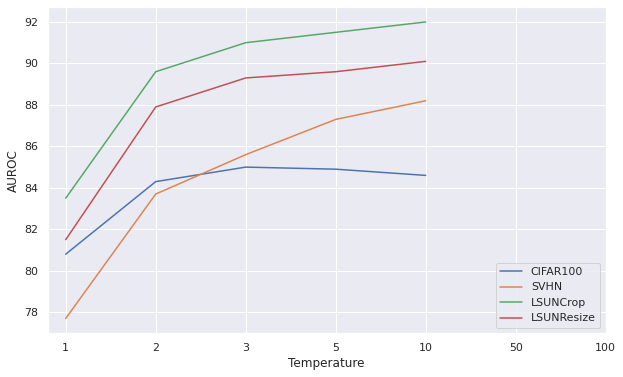

In [14]:
sns.set_theme()
df = pd.DataFrame(np.array(plot_data).T, columns=oods)
fig = plt.figure(figsize=(10, 6))
plt.plot(df)
plt.xticks(np.arange(len(temperature)), temperature)
plt.xlabel("Temperature")
plt.ylabel("AUROC")
plt.legend(oods, loc="lower right")
plt.savefig("../cache/ood_results_distilled.jpg")

In [15]:
odin_ft = pd.DataFrame(pd.read_pickle(f'/home2/temiloluwa.adeoti/contrastive_ood_detection/cache/odin_results.pickle.pickle'))
df = df2 = odin_ft
df['auroc'] = df['auroc'] * 100

temperature = df[df.ood=="CIFAR100"].temperature.sort_values().values
temperature = temperature.astype("str")

plot_data = []
oods = ["CIFAR100", "SVHN", "LSUNCrop", "LSUNResize"]
for i in oods:
    plot_data.append(df[df.ood==i].sort_values(by="temperature").auroc.values)

FileNotFoundError: [Errno 2] No such file or directory: '/home2/temiloluwa.adeoti/contrastive_ood_detection/cache/odin_results.pickle.pickle'

In [16]:
odin_ft

NameError: name 'odin_ft' is not defined

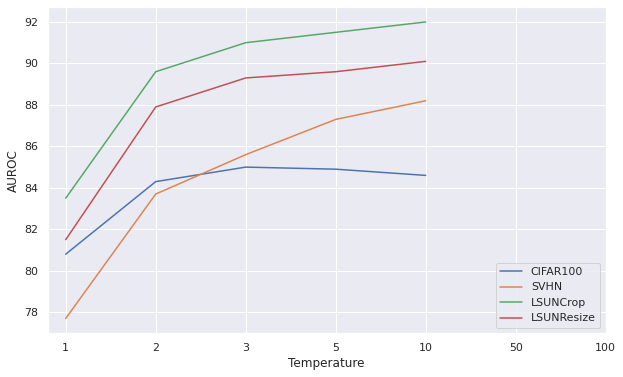

In [17]:
sns.set_theme()
df = pd.DataFrame(np.array(plot_data).T, columns=oods)
fig = plt.figure(figsize=(10, 6))
plt.plot(df)
plt.xticks(np.arange(len(temperature)), temperature)
plt.xlabel("Temperature")
plt.ylabel("AUROC")
plt.legend(oods, loc="lower right")
plt.savefig("../cache/odin_ood_results_finetune.jpg")

In [18]:
all_best_auroc = []
df = df2
for i in oods:
    best_auroc = {}
    _df = df[df.ood==i].sort_values(by=['auroc']).iloc[-1]
    best_auroc['ood'] = i
    best_auroc['temperature'] = _df['temperature']
    best_auroc['auroc'] = _df['auroc']
    all_best_auroc.append(best_auroc)
all_best_auroc = pd.DataFrame(all_best_auroc)
all_best_auroc.to_excel("../cache/odin_ood_results_finetune_best_auroc.xlsx")
all_best_auroc

NameError: name 'df2' is not defined

In [19]:
df

,CIFAR100,SVHN,LSUNCrop,LSUNResize
0,80.8,77.7,83.5,81.5
1,84.3,83.7,89.6,87.9
2,85.0,85.6,91.0,89.3
3,84.9,87.3,91.5,89.6
4,84.6,88.2,92.0,90.1


In [20]:
pd.DataFrame(pd.read_pickle("/data/temiloluwa.adeoti/fourth_experiments/CIFAR10_clus_768_neg_256/exp_1/checkpoint_259_results/ood_results/metrics_result/contrastive_enc_key_ckpt_259_avg_pool/results.pickle"))

,metric,pca components,clusters,auroc,tnr@tpr95,cluster_method,ood,idd
0,mahalanobis,10,0,57.010614,5.27,kmeans,CIFAR100,CIFAR10
1,mahalanobis,10,30,68.638942,11.01,kmeans,CIFAR100,CIFAR10
2,mahalanobis,10,50,70.518760,12.70,kmeans,CIFAR100,CIFAR10
3,cosine,0,0,54.324849,5.34,kmeans,CIFAR100,CIFAR10
4,cosine,0,30,54.953799,4.74,kmeans,CIFAR100,CIFAR10
5,cosine,0,50,55.384749,6.35,kmeans,CIFAR100,CIFAR10
6,cosine,10,0,50.264521,3.62,kmeans,CIFAR100,CIFAR10
7,cosine,10,30,57.637842,8.92,kmeans,CIFAR100,CIFAR10
8,cosine,10,50,57.793358,8.75,kmeans,CIFAR100,CIFAR10
9,mahalanobis,10,0,54.763565,6.97,kmeans,SVHN,CIFAR10


In [21]:
model_paths = [
    "/data/temiloluwa.adeoti/third_experiments/CIFAR100_clus_3072_neg_2560/exp_3/checkpoint_199_results/ood_results/metrics_result",
    "/data/temiloluwa.adeoti/third_experiments/CIFAR100_clus_5632_neg_2560/exp_300/checkpoint_199_results/ood_results/metrics_result/",
    "/data/temiloluwa.adeoti/third_experiments/CIFAR100_clus_768_neg_256/exp_0/checkpoint_199_results/ood_results/metrics_result/"
]

In [22]:
pth1 = model_paths[0]
pth1 = list(Path(pth1).iterdir())
pth1


FileNotFoundError: [Errno 2] No such file or directory: '/data/temiloluwa.adeoti/third_experiments/CIFAR100_clus_3072_neg_2560/exp_3/checkpoint_199_results/ood_results/metrics_result'

In [23]:
df1 = os.path.join(pth1[0], "results.pickle")
df1 = pd.DataFrame(pickle.load(open(df1, "rb")))
df1.head()

FileNotFoundError: [Errno 2] No such file or directory: '/results.pickle'

In [24]:
pth2 = model_paths[2]
pth2 = list(Path(pth2).iterdir())
pth2

[PosixPath('/data/temiloluwa.adeoti/third_experiments/CIFAR100_clus_768_neg_256/exp_0/checkpoint_199_results/ood_results/metrics_result/contrastive_enc_key_ckpt_119_avg_pool'),
 PosixPath('/data/temiloluwa.adeoti/third_experiments/CIFAR100_clus_768_neg_256/exp_0/checkpoint_199_results/ood_results/metrics_result/contrastive_enc_key_ckpt_179_avg_pool'),
 PosixPath('/data/temiloluwa.adeoti/third_experiments/CIFAR100_clus_768_neg_256/exp_0/checkpoint_199_results/ood_results/metrics_result/contrastive_enc_key_ckpt_19_avg_pool'),
 PosixPath('/data/temiloluwa.adeoti/third_experiments/CIFAR100_clus_768_neg_256/exp_0/checkpoint_199_results/ood_results/metrics_result/contrastive_enc_key_ckpt_199_avg_pool'),
 PosixPath('/data/temiloluwa.adeoti/third_experiments/CIFAR100_clus_768_neg_256/exp_0/checkpoint_199_results/ood_results/metrics_result/contrastive_enc_key_ckpt_139_avg_pool'),
 PosixPath('/data/temiloluwa.adeoti/third_experiments/CIFAR100_clus_768_neg_256/exp_0/checkpoint_199_results/ood_res

In [25]:
df2 = os.path.join(pth2[0], "results.pickle")
df2 = pd.DataFrame(pickle.load(open(df2, "rb")))
df2.head()

FileNotFoundError: [Errno 2] No such file or directory: '/data/temiloluwa.adeoti/third_experiments/CIFAR100_clus_768_neg_256/exp_0/checkpoint_199_results/ood_results/metrics_result/contrastive_enc_key_ckpt_119_avg_pool/results.pickle'

In [26]:
_cols = list(set(df2.columns) - set(["auroc", "tnr@tpr95"]))
merged = df2.merge(df1, on=_cols)

AttributeError: 'str' object has no attribute 'columns'

In [27]:
merged.head()

NameError: name 'merged' is not defined

In [28]:
merged[merged.auroc_x > merged.auroc_y]

NameError: name 'merged' is not defined

In [ ]:
#model_path = "/data/temiloluwa.adeoti/third_experiments/CIFAR10_clus_768_neg_256/exp_9/"
#model_path += "checkpoint_199_results/finetune/key_ckpt_199_mn_2_lp_10"
model_path = "/data/temiloluwa.adeoti/third_experiments/CIFAR10_clus_2816_neg_2560/exp_0/checkpoint_199_results/ood_results/metrics_result/contrastive_enc_key_ckpt_199_avg_pool"
#model_path = "/data/temiloluwa.adeoti/third_experiments/CIFAR10_clus_2816_neg_2560/exp_0/checkpoint_199_results/ood_results/metrics_result/finetuned_enc_key_ckpt_199_fc/mn_2"
model_path = list(Path(model_path).iterdir())
{i:k.stem for i,k in enumerate(model_path)}

In [ ]:
#df = pd.DataFrame(torch.load(model_path[0])['train_results'])
df = pd.DataFrame(pickle.load(open(model_path[9], "rb")))
df.head()

In [ ]:
df[df.ood=="CIFAR100"].sort_values(by=['auroc'], ascending=False)
#df.sort_values(by=["avgpool_auroc"], ascending=False)

In [ ]:
df

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(df.avgpool_auroc)
plt.plot(df.fc_auroc)

In [ ]:
df.sort_values(by=['fc_auroc'], ascending=False)

In [ ]:
df = pd.DataFrame(pd.read_pickle(model_path[9])).sort_values(by=["auroc"], ascending=False)
df[df.ood=="LSUNResize"]

## Merge All Results

In [ ]:
data_path = "/data/temiloluwa.adeoti/checkpoints"

model_type = "finetuned"

res_paths = [i for i in Path(data_path).rglob("*results.pickle") if \
             
             model_type in str(i)]
{i:"-".join(str(v).split("/")[4:-1]) for i, v in enumerate(res_paths)}

In [ ]:
all_df = pd.DataFrame(pd.read_pickle(res_paths[0]))
cols = list(set(all_df.columns) - set(['auroc', 'tnr@tpr95']))
all_df = all_df.rename(columns={"auroc":"res_0_auroc", "tnr@tpr95":"res_0_tnr@tpr95"})
all_df_auroc = all_df[['idd', 'ood', 'clusters', 'pca components', 'metric', 'res_0_auroc',]]
all_df_tnr = all_df[['idd', 'ood', 'clusters', 'pca components', 'metric', 'res_0_tnr@tpr95']]
all_df_auroc.head()

In [ ]:
for i in range(1, len(res_paths)):
    print(f"{i} added")
    _df = pd.DataFrame(pd.read_pickle(res_paths[i]))
    _df = _df.rename(columns={"auroc":f"res_{i}_auroc"})
    _cols = list(set(_df.columns) - set(['tnr@tpr95']))
    _df = _df[_cols]
    all_df_auroc = all_df_auroc.merge(_df, how="left", on=cols)

In [ ]:
for i in range(1, len(res_paths)):
    print(f"{i} added")
    _df = pd.DataFrame(pd.read_pickle(res_paths[i]))
    _df = _df.rename(columns={"tnr@tpr95":f"res_{i}_tnr@tpr95"})
    _cols = list(set(_df.columns) - set(['auroc']))
    _df = _df[_cols]
    all_df_tnr = all_df_tnr.merge(_df, how="left", on=cols)

In [ ]:
os.listdir("/data/temiloluwa.adeoti/checkpoints/CIFAR10_clus_2816_neg_2560/exp_0/checkpoint_199_results/finetune")

In [ ]:
all_df_auroc[all_df_auroc.ood == "CIFAR100"].sort_values(by=['res_4_auroc'], ascending=False)

## Best AUROC and TNR

In [ ]:
max_cols_per_row = all_df_auroc.iloc[:, 5:].idxmax(axis=1)
max_per_row = all_df_auroc.iloc[:, 5:].max(axis=1)
best_aurocs = pd.concat([all_df_auroc.iloc[:, :5], max_cols_per_row, max_per_row], axis=1).\
        rename(columns={0: "model", 1: "max_auroc"})

best_aurocs_near = best_aurocs[best_aurocs.ood=="CIFAR100"]
best_aurocs_far = best_aurocs[best_aurocs.ood!="CIFAR100"]

In [ ]:
best_aurocs_near.sort_values(by=["max_auroc"], ascending=False)

In [ ]:
best_aurocs_far.sort_values(by=["max_auroc"], ascending=False)

In [ ]:
idx = best_aurocs.groupby(["ood", "metric"], sort=False)["max_auroc"].transform(max) == best_aurocs["max_auroc"]
best_per_ds = best_aurocs[idx]

_tnr = []
id_x = list(zip(best_per_ds.index, best_per_ds.model.apply(lambda x:x[:5] + "_tnr@tpr95").values))
for i in id_x:
    _tnr.append({"tnr@tpr95":all_df_tnr.loc[i]})

_df = pd.concat([best_per_ds.reset_index(drop=True), pd.DataFrame(_tnr)], axis=1)
_df
#_df.to_excel("../cache/best_results.xlsx")

## Models Results Comparision
* exp 0 - clus: 2816, avgpool -> fc -> logits
* exp 2 - clus: 2816, avgpool -> fc ->logits, MOCO
* exp 3 - clus: 2816, 5120, avgpool -> fc -> logits
* exp 4 - clus: 2816, 5120, 7680, avgpool-> fc-> logits
* exp 5 - clus: 2816, avgpool -> fc -> fc-> logits

In [ ]:
# corresponds to exp 0, 3, 4, 5, respectively
act_nos = [0, 3, 4, 5]
res_nos = [8, 17, 0, 10]
encoder_type = "key"
for i, n in enumerate(res_nos):
    _pth = res_paths[n]
    exp_name = f"exp_{act_nos[i]}"
    assert exp_name in str(_pth), "wrong name"
    assert encoder_type in str(_pth), "wrong encoder type"

In [ ]:
models_ = {f"res_{res_nos[i]}_auroc": f"model_{act_nos[i]}_auroc" for i in range(len(res_nos))}
df_comp = all_df_auroc[cols + [k for k, _ in models_.items()]].\
    sort_values(by=[f"res_{res_nos[0]}_auroc"], ascending=False).\
        rename(columns=models_)
df_comp.head()

In [ ]:
ood = "CIFAR100"
pca = 10
metric = "mahalanobis"
combos_ = [("SVHN", 0, "cosine"), ("SVHN", 0, "euclidean"), ("SVHN", 10, "mahalanobis"),\
 ("LSUNCrop", 0, "cosine"), ("LSUNCrop", 0, "euclidean"), ("LSUNCrop", 10, "mahalanobis"),\
 ("LSUNResize", 0, "cosine"), ("LSUNResize", 0, "euclidean"), ("LSUNResize", 10, "mahalanobis"),\
 ("CIFAR100", 10, "cosine"), ("CIFAR100", 10, "euclidean"), ("CIFAR100", 10, "mahalanobis"),\
]

def plt_auroc_ood_pca_metric(ood, pca, metric, figtype=None):
    _df = df_comp[(df_comp.ood == ood) & (df_comp["pca components"] == pca) & (df_comp.metric== metric)]
    f, axes = plt.subplots(1, 1, figsize=(20, 10))
    _cols = list(set(_df.columns) - set(cols))
    sns.set_style("whitegrid")
    sns.set(font_scale=1.4) 
    sns.barplot(
        data=pd.melt(_df, id_vars=cols, value_vars=_cols).rename(columns={"value":"AUROC"}).sort_values(by=["variable"]),
        x="clusters", y="AUROC", hue="variable", ax=axes)
    axes.set_title(f"{ood}: PCA - {pca}, Metric - {metric.capitalize()}")
    axes.legend(loc="lower right")
    if figtype:
        f.savefig(f'../cache/{figtype}_{ood}_{pca}_{metric}.png')

for (ood, pca, metric) in combos_:
    plt_auroc_ood_pca_metric(ood, pca, metric, figtype="contras")

In [ ]:
for i in Path("../cache").iterdir():
    if ".png" not in str(i) and ".xlsx" not in str(i):
        os.remove(i)

## Contrastive Model then Finetune Comparision

* exp 7 - contrastive_model key
* exp 4 - finetune - fc layer
* exp 1 - finetune - avgpool layer

In [ ]:
models_ = {"contrastive":"res_8_auroc", 
           "ft_avgpool layer":"res_1_auroc", 
           "ft_logits":"res_4_auroc"}

df_comp = all_df_auroc[cols + [v for _, v in models_.items()]].\
    sort_values(by=["res_8_auroc"], ascending=False).\
        rename(columns={v:k for k,v in models_.items()})
df_comp.head()

In [ ]:
combos_ = [("SVHN", 5, "cosine"), 
 ("LSUNCrop", 5, "cosine"),
 ("LSUNResize", 0, "cosine"),
 ("CIFAR100", 0, "cosine")
]

for (ood, pca, metric) in combos_:
    plt_auroc_ood_pca_metric(ood, pca, metric, figtype="all")

In [ ]:
for i in Path("../cache").iterdir():
    if ".xlsx" not in str(i):
        os.remove(i)